C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score: 0.3133542927728863


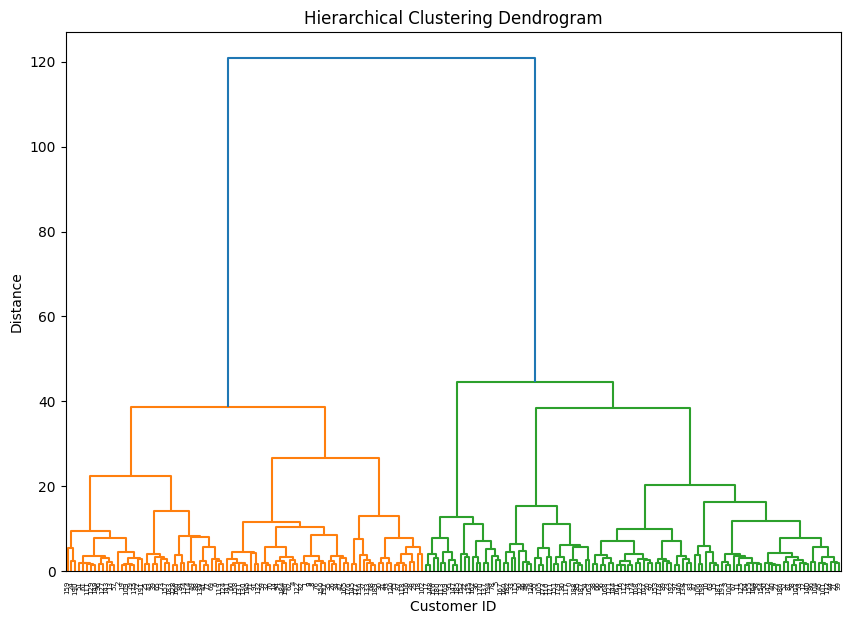

,CustomerID,Lookalike_CustomerID,Score,Recommendation_Rank,Cluster
0,C0001,C0086,0.922560,1,0
1,C0001,C0056,0.911202,2,0
2,C0001,C0190,0.906501,3,0
3,C0001,C0189,0.904509,4,0
4,C0001,C0174,0.891723,5,0


In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Load Lookalike Data
lookalike_df = pd.read_csv('Enhanced_Lookalike.csv')

# Step 2: Prepare the feature matrix from similarity scores
# We will use the similarity score as a feature for each customer and create a similarity matrix for clustering
customer_similarity_matrix = lookalike_df.pivot_table(index='CustomerID', columns='Lookalike_CustomerID', values='Score', aggfunc='mean')

# Step 3: Perform Agglomerative Clustering (Hierarchical Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(customer_similarity_matrix.fillna(0))  # Replace NaN with 0 (no similarity)

# Step 4: Calculate Clustering Metrics (Silhouette Score)
sil_score = silhouette_score(customer_similarity_matrix.fillna(0), labels)
print(f"Silhouette Score: {sil_score}")

# Step 5: Visualize Clusters using a Dendrogram
plt.figure(figsize=(10, 7))
Z = linkage(customer_similarity_matrix.fillna(0), 'ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Distance')
plt.show()

# Step 6: Add Cluster Labels to the DataFrame
lookalike_df['Cluster'] = lookalike_df['CustomerID'].map(lambda x: labels[customer_similarity_matrix.index.get_loc(x)])

# Step 7: Save Clustered Data
lookalike_df.to_csv('Lookalike_Clustered.csv', index=False)

# Display the first few rows of clustered data
lookalike_df.head()
